### Project description:
+ Finding SMA Crossover Strategy

In [121]:
# project dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests 
from collections import Counter
plt.style.use('fivethirtyeight')

In [205]:
# Creating first test case by initiating the first dataframe for UCO

# URL >> https://query1.finance.yahoo.com/v8/finance/chart/{$symbol}?range={$range}&interval={$interval}
# symbol >> the stock ticker symbol, e.g. AAPL for Apple
# range >> the desired range of the query, allowed parameters are [1d, 5d, 1mo, 3mo, 6mo, 1y, 2y, 5y, 10y, ytd, max]
# interval >> the desired interval of the quote, e.g. every 5 minutes, allowed parameters are [1m, 2m, 5m, 15m, 30m, 60m, 90m, 1h, 1d, 5d, 1wk, 1mo, 3mo]

ENDPOINT = "https://query1.finance.yahoo.com/v8/finance/chart/"

# Stock symbol
symbol = ["AAPL","UCO"]
def createURL(sym, ran, inter):
    return ENDPOINT+sym+"?"+"range="+ran+"&interval="+inter


In [307]:
# Fetching data
url = createURL(symbol[1], "6mo", "1d")
req = requests.get(url).json()
_rawcolumn_names = list(req['chart']['result'][0])
values = req['chart']['result'][0][_rawcolumn_names[2]]['quote'][0]
cols = list(values.keys())



In [308]:
# Create Dataframe 
df = pd.DataFrame(columns=cols)
df[cols[0]] = values['high']
df[cols[1]] = values['open']
df[cols[2]] = values['close']
df[cols[3]] = values['volume']
df[cols[4]] = values['low']


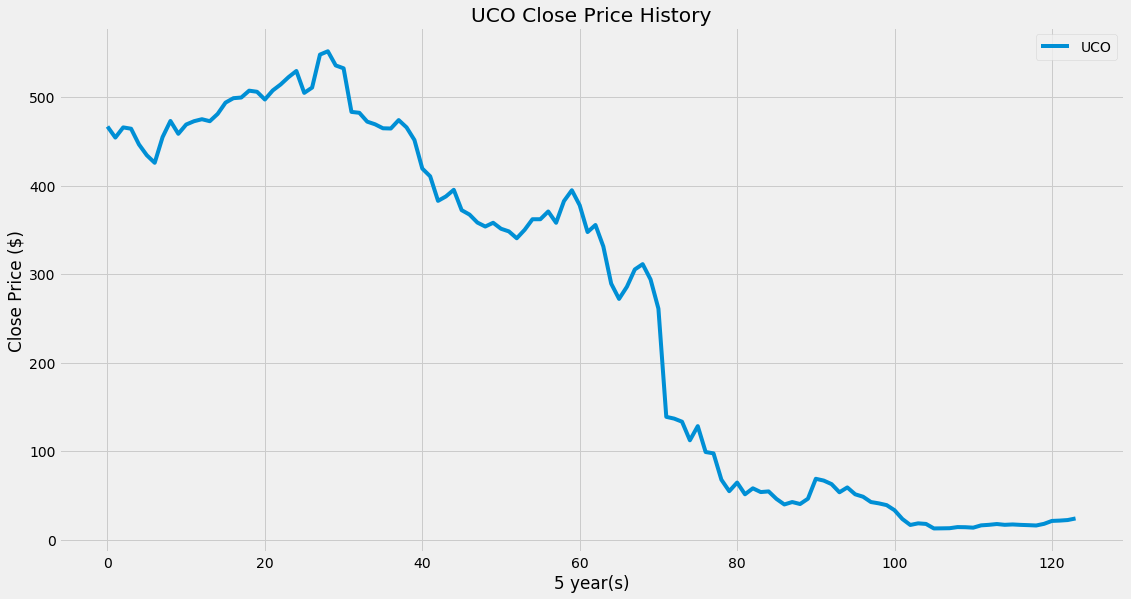

In [309]:
# Plotting the data
plt.figure(figsize=(17, 9))
plt.plot(df['close'], label="UCO")
plt.title("UCO Close Price History")
plt.xlabel('180 day(s)')
plt.ylabel('Close Price ($)')
plt.legend(loc="upper right")
plt.show()

In [317]:
# Create the SMA for 30 days

sma_30 = pd.DataFrame()
sma_30['Close Price'] = df['close'].rolling(window= 30).mean()

# Create the SMA for 5 days
sma_5 = pd.DataFrame()
sma_5['Close Price'] = df['close'].rolling(window= 5).mean()

sma_5

,Close Price
0,NaN
1,NaN
2,NaN
3,NaN
4,459.500
...,...
119,16.822
120,17.620
121,18.588
122,19.742


In [318]:
# Create the SMA for 100 days

sma_100 = pd.DataFrame()
sma_100['Close Price'] = df['close'].rolling(window= 100).mean()

# Create the SMA for 10 days
sma_10 = pd.DataFrame()
sma_10['Close Price'] = df['close'].rolling(window= 10).mean()
sma_10

,Close Price
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
119,16.493
120,17.255
121,17.794
122,18.334


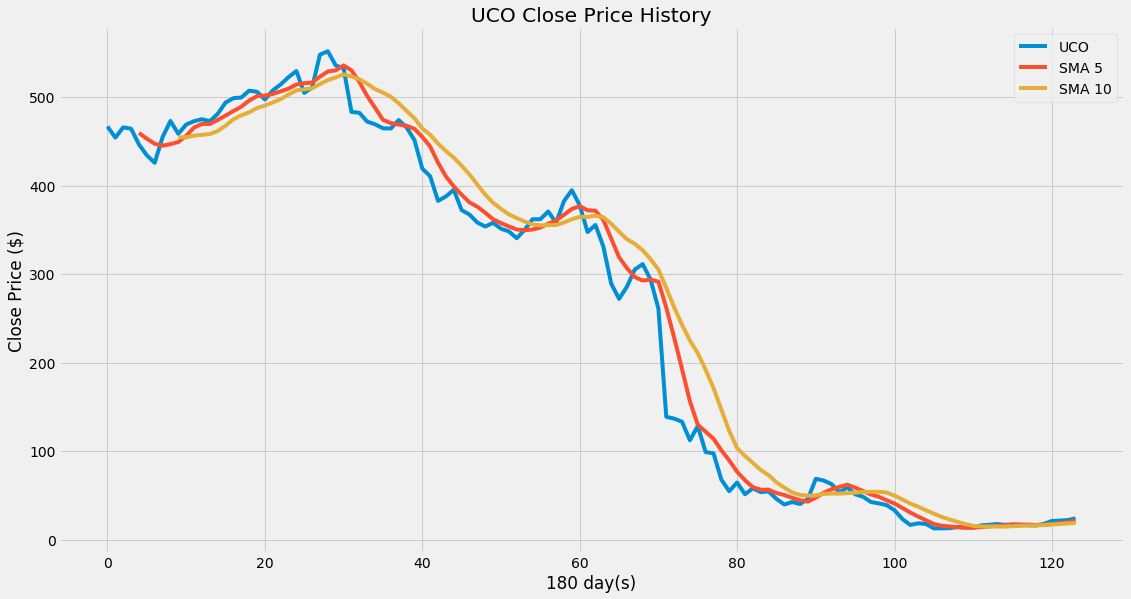

In [319]:
# Plotting the data
plt.figure(figsize=(17, 9))
plt.plot(df['close'], label="UCO")
plt.plot(sma_5['Close Price'], label="SMA 5")
plt.plot(sma_10['Close Price'], label="SMA 10")
plt.title("UCO Close Price History")
plt.xlabel('180 day(s)')
plt.ylabel('Close Price ($)')
plt.legend(loc='upper right')
plt.show()

In [320]:
# Merging all the columns into one table
data = pd.DataFrame()
data['UCO'] = df['close']
data['SMA 5'] = sma_5['Close Price']
data['SMA 10'] = sma_10['Close Price']
data

,UCO,SMA 5,SMA 10
0,466.750000,NaN,NaN
1,454.250000,NaN,NaN
2,465.750000,NaN,NaN
3,464.250000,NaN,NaN
4,446.500000,459.500,NaN
...,...,...,...
119,17.870001,16.822,16.493
120,21.160000,17.620,17.255
121,21.530001,18.588,17.794
122,22.150000,19.742,18.334


In [323]:
# Creating the signal when to buy and sell the stock

def create_signal(data):
    buy_sig_price = []
    sell_sig_price = []
    flag = -1
    
    for i in range(len(data)):
        if data['SMA 5'][i] > data['SMA 10'][i]:
            
            if flag != 1:
                
                buy_sig_price.append(data["UCO"][i])
                sell_sig_price.append(np.nan)
                flag = 1
                
            else:
                buy_sig_price.append(np.nan)
                sell_sig_price.append(np.nan)
                
        elif data['SMA 5'][i] < data['SMA 10'][i]:
            
            if flag != 0:
                    
                buy_sig_price.append(np.nan)
                sell_sig_price.append(data["UCO"][i])
                flag = 0
                
            else:
                
                buy_sig_price.append(np.nan)
                sell_sig_price.append(np.nan)
                
        else:
            
            buy_sig_price.append(np.nan)
            sell_sig_price.append(np.nan)
                
    return (buy_sig_price, sell_sig_price)

In [324]:
# Storing values into a variable

buy_sell = create_signal(data)
data["Buy Signal Price"] = buy_sell[0]
data["Sell Signal Price"] = buy_sell[1]

#show data
data

,UCO,SMA 5,SMA 10,Buy Signal Price,Sell Signal Price
0,466.750000,NaN,NaN,NaN,NaN
1,454.250000,NaN,NaN,NaN,NaN
2,465.750000,NaN,NaN,NaN,NaN
3,464.250000,NaN,NaN,NaN,NaN
4,446.500000,459.500,NaN,NaN,NaN
...,...,...,...,...,...
119,17.870001,16.822,16.493,NaN,NaN
120,21.160000,17.620,17.255,NaN,NaN
121,21.530001,18.588,17.794,NaN,NaN
122,22.150000,19.742,18.334,NaN,NaN


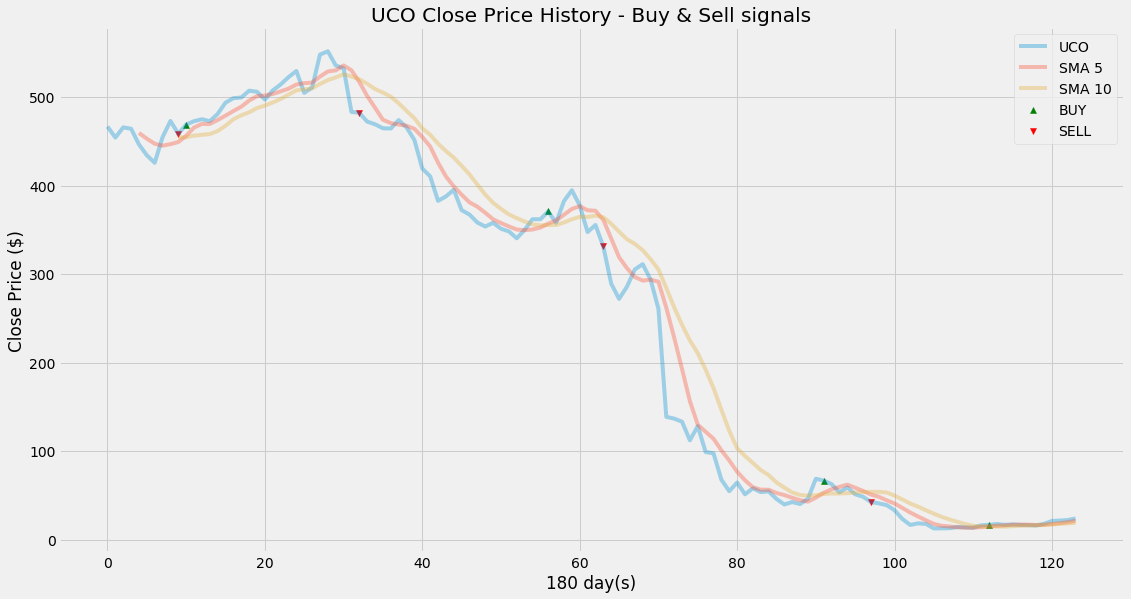

In [325]:
# Plotting the data
plt.figure(figsize=(17, 9))
plt.plot(data['UCO'], label="UCO", alpha=.35)
plt.plot(data['SMA 5'], label="SMA 5", alpha=.35)
plt.plot(data['SMA 10'], label="SMA 10", alpha=.35)
plt.scatter(data.index, data['Buy Signal Price'], label="BUY", marker="^", color='green')
plt.scatter(data.index, data['Sell Signal Price'], label="SELL", marker="v", color='red')
plt.title("UCO Close Price History - Buy & Sell signals")
plt.xlabel('180 day(s)')
plt.ylabel('Close Price ($)')
plt.legend(loc='upper right')
plt.show()